In [1]:
import jitcsde

import os
os.environ["CFLAGS"] = ""


#from jitcdde import y, t
from jitcdde import y as yd, t as td, jitcdde

Simple model that describes a protein which can be in an active or inactive state, involved in two feedback loops 

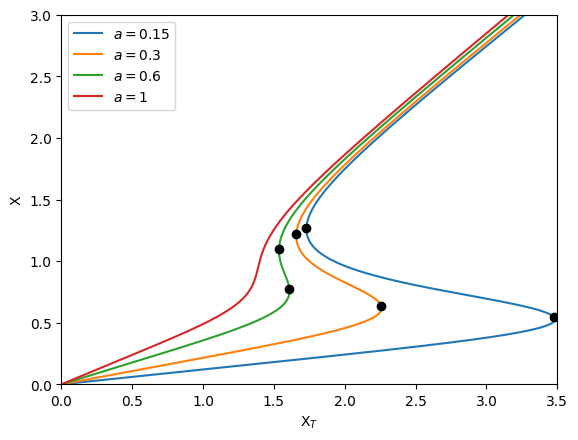

In [2]:
## Demo file for the code that was used in the paper
## Dynamic bistable switches enhance robustness and accuracy of cell cycle transitions
## by Jan Rombouts and Lendert Gelens

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 28})  # Change 14 to whatever size you want


# import package to draw bistable switches and utility functions
import changingswitches as cs
import csutils as csu


### compute bistable switch and draw for different values of a (cfr Fig.2E)

av = [0.15,0.3,0.6,1]



fig, ax = plt.subplots()
for i, a in enumerate(av):
    switch = cs.ResponseOneEnzymeXt(b=1, K=1., n=5, ap=0.1, bp=1, Kp=1., m=5, a=a)

    #continuation parameters
    switch.setcontpars(0.01,2000)
    # starting values of point and vector
    switch.setstart(0,0,[1,0])

    switch.compute_responsecurve()
    # after running compute_responsecurve(),
    # the switch object contains XT and X values and fold coordinates if there are
    l, = ax.plot(switch.xtv, switch.xv, label='$a = {}$'.format(a))
    if switch.folds:
        for f in switch.folds:
            ax.plot(f[0], f[1], 'ko')

ax.set_xlim(0,3.5)
ax.set_ylim(0,3)
ax.set_xlabel('X$_{T}$')
ax.set_ylabel('X')
ax.legend()
plt.show()

Plot of Xt (total concentration) vs. active -- altering basal activation parameter a (which can be shown in parallel to activity of phosphatase Cdc25) 


/var/folders/m9/dlgyt1c107q873spv2dfjcjh0000gn/T/ipykernel_21349/3334795637.py:17: RuntimeWarning: invalid value encountered in divide
  l, = ax.plot(switch.xtv, switch.xv/switch.xtv, label='$a = {}$'.format(a))


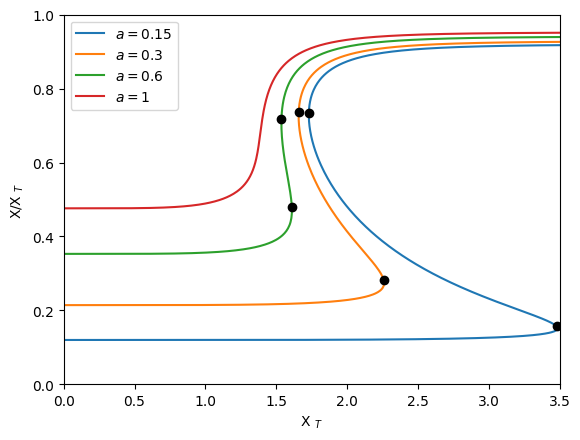

In [3]:
### compute bistable switch and draw for different values of a (cfr Fig.2E)

av = [0.15,0.3,0.6,1]

fig, ax = plt.subplots()
for i, a in enumerate(av):
    switch = cs.ResponseOneEnzymeXt(b=1, K=1., n=5, ap=0.1, bp=1, Kp=1., m=5, a=a)

    #continuation parameters
    switch.setcontpars(0.01,2000)
    # starting values of point and vector
    switch.setstart(0,0,[1,0])

    switch.compute_responsecurve()
    # after running compute_responsecurve(),
    # the switch object contains XT and X values and fold coordinates if there are
    l, = ax.plot(switch.xtv, switch.xv/switch.xtv, label='$a = {}$'.format(a))
    if switch.folds:
        for f in switch.folds:
            ax.plot(f[0], f[1]/f[0], 'ko')

ax.set_xlim(0,3.5)
ax.set_ylim(0,1)
ax.set_xlabel('X $_{T}$')
ax.set_ylabel('X/X $_{T}$')
ax.legend()
plt.show()

Plotted as a percentage in active state 

Increase in a (basal activation parameter): 
- Perc of total greater 
- With greater a, less of total needed to reach switch threshold 
- If a is low, much greater threshold needed to switch 

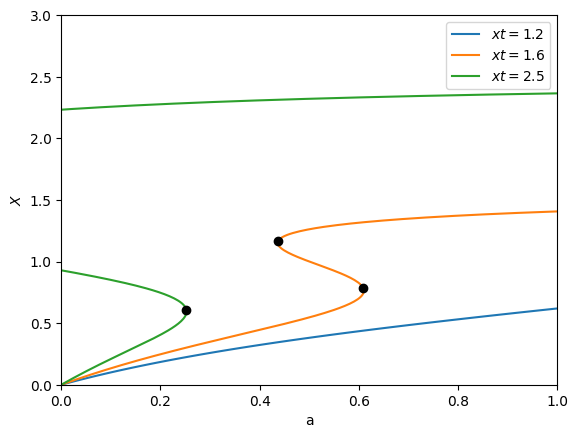

In [4]:
### compute bistable switch and draw for different values of a (cfr Fig.2E)

xt = [1.2, 1.6, 2.5]

fig, ax = plt.subplots()
for i, a in enumerate(xt):
    switch = cs.ResponseOneEnzyme(b=1, K=1., n=5, ap=0.1, bp=1, Kp=1., m=5, Xt=a)

    #continuation parameters
    switch.setcontpars(0.01,2000)
    # starting values of point and vector
    switch.setstart(0,0,[1,0])

    switch.compute_responsecurve()
    # after running compute_responsecurve(),
    # the switch object contains XT and X values and fold coordinates if there are

    l, = ax.plot(switch.av, switch.xv, label='$xt = {}$'.format(a))
    if switch.folds:
        for f in switch.folds:
            ax.plot(f[0], f[1], 'ko')

ax.set_xlim(0,1)
ax.set_ylim(0,3)
ax.set_xlabel('a')
ax.set_ylabel('$X$')
plt.legend()
plt.show()

Steady-state response to a basal activation rate a, for different values of total concentration Xt 

- For low values, no bistability with hyperbolic response 
- For intermediate values, leads to bistable response curve 
- For high values of XT, switch is not only irreversible with small changes in the input but even lowering the input to zero is not sufficient to drive the system back to its inactive state (irreversibility) 

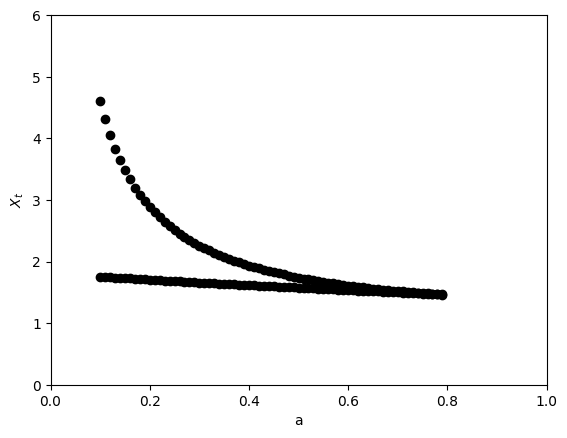

In [5]:
### compute bistable switch and draw for different values of a (cfr Fig.2E)

av = np.arange(0.1, 1, 0.01)

fig, ax = plt.subplots()
for i, a in enumerate(av):
    switch = cs.ResponseOneEnzymeXt(b=1, K=1., n=5, ap=0.1, bp=1, Kp=1., m=5, a=a)

    #continuation parameters
    switch.setcontpars(0.01,2000)
    # starting values of point and vector
    switch.setstart(0,0,[1,0])

    switch.compute_responsecurve()
    # after running compute_responsecurve(),
    # the switch object contains XT and X values and fold coordinates if there are

    #l, = ax.plot(switch.xtv, switch.xv, label='$a = {}$'.format(a))
    if switch.folds:
        for f in switch.folds:
            ax.plot(a, f[0], 'ko')

ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.set_xlabel('a')
ax.set_ylabel('$X_{t}$')
plt.show()

Two-parameter bifurcation diagram of the system. Bistable region in within the dotted region. 

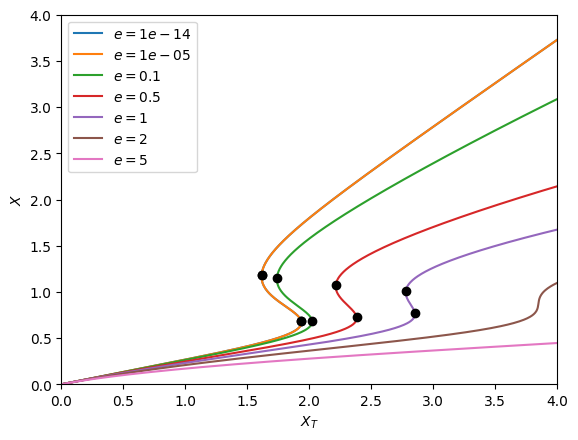

In [6]:
### compute bistable switch and draw for different values of a (cfr Fig.2E)

epi = [0.00000000000001, 0.00001, 0.1, 0.5, 1, 2, 5]

fig, ax = plt.subplots()
for i, e in enumerate(epi):
    
    switch = cs.ResponseOneEnzymeXt_withdeg(b=1, K=1., n=5, ap=0.1, bp=1, Kp=1., m=5, a=0.4, epsilon=e)

    #continuation parameters
    switch.setcontpars(0.01,2000)
    # starting values of point and vector
    switch.setstart(0,0,[1,0])

    switch.compute_responsecurve()
    # after running compute_responsecurve(),
    # the switch object contains XT and X values and fold coordinates if there are

    l, = ax.plot(switch.xtv, switch.xv, label='$e = {}$'.format(e))
    if switch.folds:
        for f in switch.folds:
            ax.plot(f[0], f[1], 'ko')

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xlabel('$X_{T}$')
ax.set_ylabel('$X$')
ax.legend()
plt.show()

To study the effect of the transition from low to high activity when protein is produced where the small parameter e (epsilon) is added to model timescale separation to describe that the activation-inactivation dynamics of the protein are much faster than its production 

- When the total protein concentration increases at a constant rate, the protein will suddenly increase at the moment Xt crosses the activation threshold of the switch 